In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

  

In [3]:
def import_pokemon():
    return pd.read_csv('datasets\Pokemon.csv')

pokemon = import_pokemon()
pokemon.head(n=10)  

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Lets find out the shape of this dataset


In [4]:
print('The columns of the dataset are: ',pokemon.columns)
print('The shape of the dataframe is: ',pokemon.shape)

The columns of the dataset are:  Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
The shape of the dataframe is:  (800, 13)


In [5]:
pokemon.columns = pokemon.columns.str.upper().str.replace('_', '')

pokemon = pokemon.drop(['#'],axis=1)
pokemon = pokemon.set_index('NAME')

pokemon.head(10)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


Validating wether Legendary type Pokemon are included as well


In [6]:
pokemon[pokemon['LEGENDARY']==True].head(10)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
Suicune,Water,NaN,580,100,75,115,90,115,85,2,True


So were able to import our Data Set, though we can still see NaN values, as well as the word Mega being next to the designated Pokemon without a space.

Since the NaN value is because the Pokemon doesnt have a Secondary Type value or TYPE 2, well take any value that has a NaN, and assign it the same value it had for Type 1

In [8]:
pokemon.index = pokemon.index.str.replace(".*(?=Mega)", "")
pokemon['TYPE 2'].fillna(pokemon['TYPE 1'], inplace=True)
pokemon.head(10)

,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


Now that weve sanitized the TYPE # value, lets List the Types and the count of unique Types in this dataset as well as see the total count of those values



In [7]:
print('The unique  pokemon types are',pokemon['TYPE 1'].unique())
print('The number of unique types are',pokemon['TYPE 1'].nunique())
(pokemon['TYPE 1'].value_counts(),pokemon['TYPE 2'].value_counts())

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


(Water       112
 Normal       98
 Grass        70
 Bug          69
 Psychic      57
 Fire         52
 Electric     44
 Rock         44
 Dragon       32
 Ghost        32
 Ground       32
 Dark         31
 Poison       28
 Fighting     27
 Steel        27
 Ice          24
 Fairy        17
 Flying        4
 Name: TYPE 1, dtype: int64,
 Flying      97
 Ground      35
 Poison      34
 Psychic     33
 Fighting    26
 Grass       25
 Fairy       23
 Steel       22
 Dark        20
 Dragon      18
 Water       14
 Rock        14
 Ice         14
 Ghost       14
 Fire        12
 Electric     6
 Normal       4
 Bug          3
 Name: TYPE 2, dtype: int64)

Perfect, We're cooking with Gas. Now, lets view some Example Pokemon and see the Different Column values each have

We'll Pick Bulbasaur & Kakuna for this example.


In [9]:
print(pokemon.loc['Kakuna'])
print('\n')
print(pokemon.loc['Bulbasaur'])

TYPE 1           Bug
TYPE 2        Poison
TOTAL            205
HP                45
ATTACK            25
DEFENSE           50
SP. ATK           25
SP. DEF           25
SPEED             35
GENERATION         1
LEGENDARY      False
Name: Kakuna, dtype: object


TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object


In [10]:
print(pokemon.loc['Kakuna'])
print('\n')
print(pokemon.loc['Bulbasaur'])

TYPE 1           Bug
TYPE 2        Poison
TOTAL            205
HP                45
ATTACK            25
DEFENSE           50
SP. ATK           25
SP. DEF           25
SPEED             35
GENERATION         1
LEGENDARY      False
Name: Kakuna, dtype: object


TYPE 1         Grass
TYPE 2        Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP. ATK           65
SP. DEF           65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object


And the dataset as a whole for Visualization..

In [11]:
pokemon_summary = pokemon.describe() \
                         .round(2)
pokemon_summary

,TOTAL,HP,ATTACK,DEFENSE,SP. ATK,SP. DEF,SPEED,GENERATION
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,435.10,69.26,79.00,73.84,72.82,71.90,68.28,3.32
std,119.96,25.53,32.46,31.18,32.72,27.83,29.06,1.66
min,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,330.00,50.00,55.00,50.00,49.75,50.00,45.00,2.00
50%,450.00,65.00,75.00,70.00,65.00,70.00,65.00,3.00
75%,515.00,80.00,100.00,90.00,95.00,90.00,90.00,5.00
max,780.00,255.00,190.00,230.00,194.00,230.00,180.00,6.00


Visualization of Pokemon between all Generations, Attack Points

What we can see here is that theres the highest average of Attack points between all pokemon, between the 60-75 Range when utilizing a Bar graph. Using avxline to detail the average value location specifically, we can further notice the raw value lands at 77

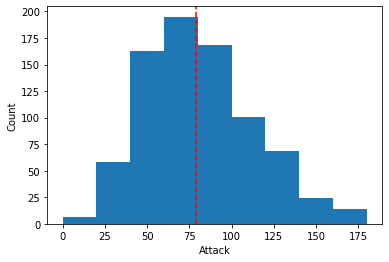

In [13]:

bins=range(0,200,20)
plt.hist(pokemon["ATTACK"],bins,histtype="bar")
plt.xlabel('Attack')
plt.ylabel('Count')
plt.plot()
plt.axvline(pokemon['ATTACK'].mean(),linestyle='dashed',color='red')
plt.show()

Distribution of Pokemon Types¶


Using a pie chart, we can see the overall breakdown of all TYPES of Pokemon throughout all Generations. Water types have a heavy bias, with Normal & Grass types following.

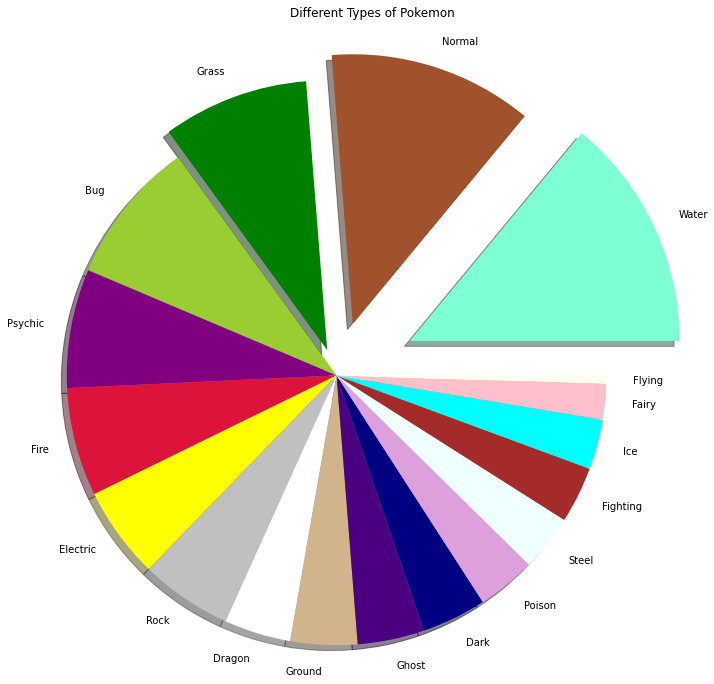

In [14]:
labels = ['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying']
colors = ['aquamarine', 'sienna', 'green', 'yellowgreen', 'purple', 'crimson', 'yellow', 'silver', 'white', 'tan', 'indigo', 'navy', 'plum', 'azure', 'brown', 'cyan', 'pink', 'ivory']
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 32, 32, 32, 31, 28, 27, 27, 24, 17, 4]
explode = (0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie (sizes, labels=labels, shadow=True, colors=colors, explode=explode)

plt.axis('equal')
plt.title("Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Stat visualization of All Pokemon

Using a boxplot we can find the distribution groupings of stats between all Pokemon

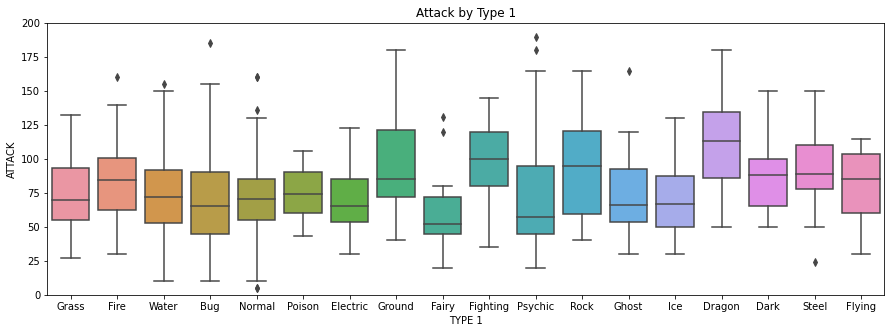

In [15]:
pokemon_wo_gen=pokemon.drop(['GENERATION','TOTAL', 'LEGENDARY'],axis=1)
plt.subplots(figsize = (15,5))
plt.title('Attack by Type 1')
sea.boxplot(x = "TYPE 1", y = "ATTACK",data = pokemon_wo_gen)
plt.ylim(0,200)
plt.show()